# Timeframe Analysis

In this notebook we analyse the timestamp property of the dataset.
We want to briefly check if there are anomalies in the timeframe, e.g. are there days where no prompts were collected?


In [38]:
import pandas as pd
#df = pd.read_parquet('sources/metadata.parquet', engine='pyarrow')
df_large = pd.read_parquet('sources/metadata-large.parquet', engine='pyarrow')
df_large_unique_prompts = df_large.drop_duplicates(subset="prompt").copy()

# read excel_artist_names
import my_utils
excel_artist_names = my_utils.read_lines_as_list("sources/excel_artists_copy_paste_name.txt")
hundred_artist_names =  excel_artist_names[0:100]
assert len(hundred_artist_names) == 100
ten_artist_names = excel_artist_names[0:10]
assert len(ten_artist_names) == 10

## Data Collection Interval

In [4]:
print(df_large.timestamp.describe(datetime_is_numeric=True))

count                               14000000
mean     2022-08-12 18:44:51.288393984+00:00
min                2022-08-06 21:59:00+00:00
25%                2022-08-10 09:08:00+00:00
50%                2022-08-12 13:20:00+00:00
75%                2022-08-14 21:49:00+00:00
max                2022-08-20 13:33:00+00:00
Name: timestamp, dtype: object


## Data Distribution over time

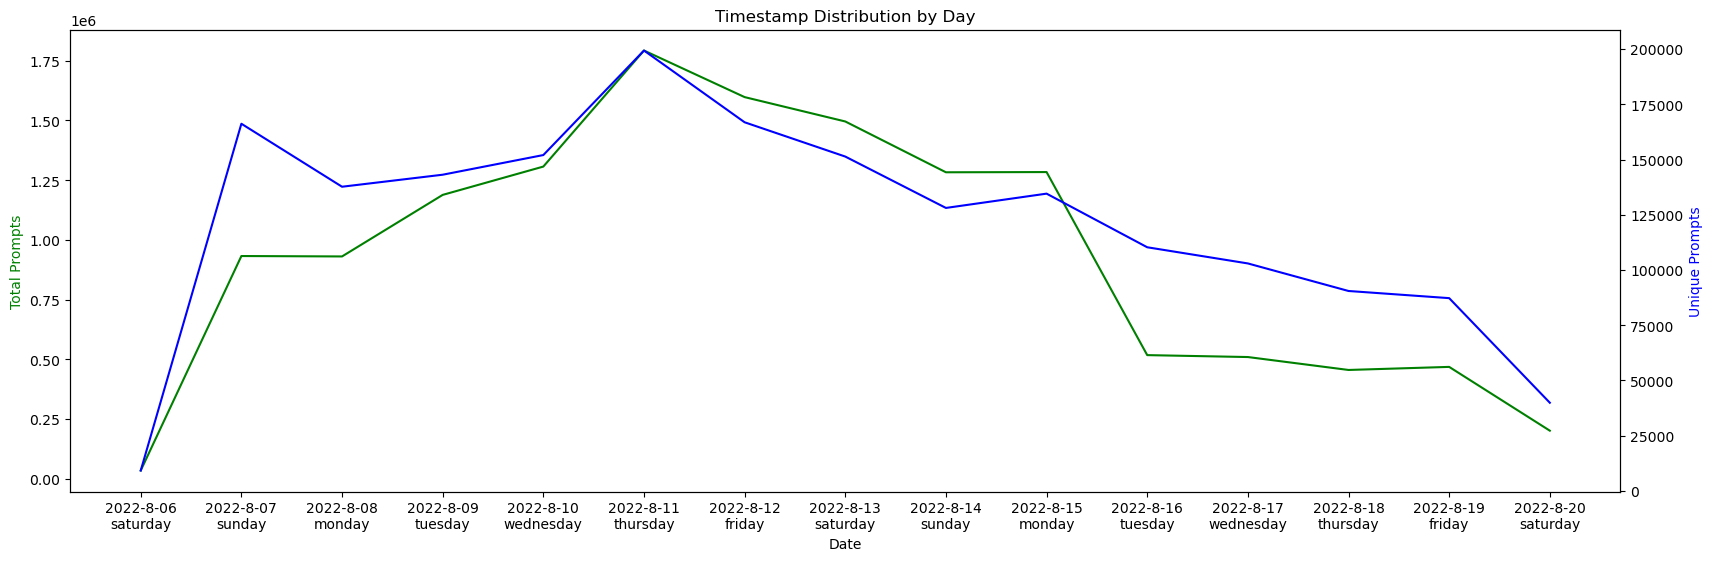

In [44]:
# Analysing by Day requires a new column

weekday_mapping = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

df_large["date"] = df_large.timestamp.apply(lambda x: f'{x.year}-{x.month}-{str(x.day).zfill(2)}\n{weekday_mapping[x.weekday()]}')
df_large_unique_prompts["date"] = df_large_unique_prompts.timestamp.apply(lambda x: f'{x.year}-{x.month}-{str(x.day).zfill(2)}\n{weekday_mapping[x.weekday()]}')

vc = df_large.date.value_counts(sort=False)
vc.sort_index(inplace=True)


unique_vc = df_large_unique_prompts.date.value_counts(sort=False)
unique_vc.sort_index(inplace=True)


import matplotlib.pyplot as plt
x_data = []
y_data_total = []
y_data_unique = []
for index, value in vc.items():
    x_data.append(index)
    y_data_total.append(value)
    
for index, value in unique_vc.items():
    y_data_unique.append(value)


fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()
ax1.plot(x_data, y_data_total, 'g-')
ax2.plot(x_data, y_data_unique, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Prompts', color='g')
ax2.set_ylabel('Unique Prompts', color='b')
ax1.set_title('Timestamp Distribution by Day')

plt.show()

## Average Prompt Length per day

date
2022-8-06\nsaturday      85.881512
2022-8-07\nsunday       119.834383
2022-8-08\nmonday       150.259012
2022-8-09\ntuesday      171.974663
2022-8-10\nwednesday    177.037038
2022-8-11\nthursday     170.686479
2022-8-12\nfriday       179.616778
2022-8-13\nsaturday     182.547803
2022-8-14\nsunday       180.832119
2022-8-15\nmonday       179.811709
2022-8-16\ntuesday      168.210800
2022-8-17\nwednesday    170.546291
2022-8-18\nthursday     167.181866
2022-8-19\nfriday       168.017465
2022-8-20\nsaturday     182.126993
Name: prompt_length, dtype: float64


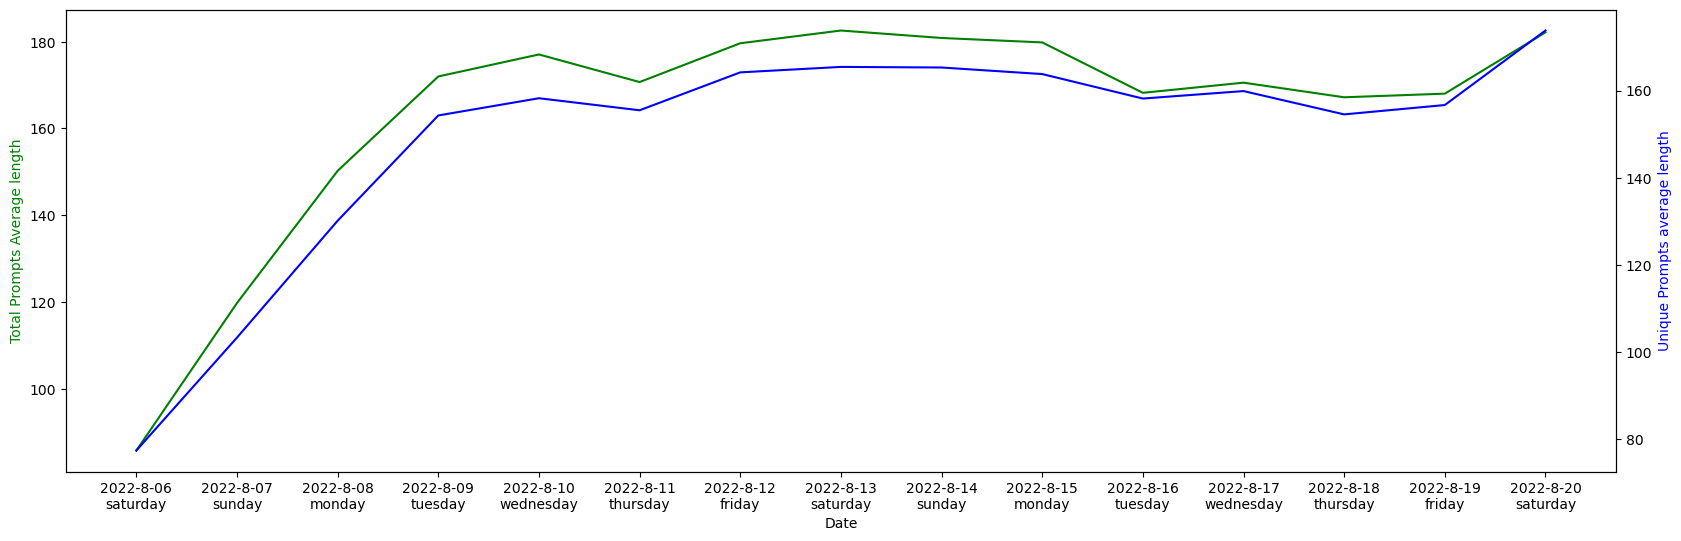

In [42]:
weekday_mapping = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
df_large["date"] = df_large.timestamp.apply(lambda x: f'{x.year}-{x.month}-{str(x.day).zfill(2)}\n{weekday_mapping[x.weekday()]}')
df_large_unique_prompts["date"] = df_large_unique_prompts.timestamp.apply(lambda x: f'{x.year}-{x.month}-{str(x.day).zfill(2)}\n{weekday_mapping[x.weekday()]}')

df_large["prompt_length"] = df_large.prompt.apply(lambda x: len(x))
df_large_unique_prompts["prompt_length"] = df_large_unique_prompts.prompt.apply(lambda x: len(x))

length_date = df_large.groupby(["date"]).prompt_length.mean()
length_date_unique = df_large_unique_prompts.groupby(["date"]).prompt_length.mean()
#print(length_date)

import matplotlib.pyplot as plt
x_data = []
y_data_total = []
y_data_unique = []
for index, value in length_date.items():
    x_data.append(index)
    y_data_total.append(value)
    
for index, value in length_date_unique.items():
    y_data_unique.append(value)


fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()
ax1.plot(x_data, y_data_total, 'g-')
ax2.plot(x_data, y_data_unique, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Prompts Average length', color='g')
ax2.set_ylabel('Unique Prompts average length', color='b')
ax1.set_title('Avg Prompt Length by Day')

plt.show()

## Number of Unique Users per Day

Number of unique users per day
['2022-8-06\nsaturday', '2022-8-07\nsunday', '2022-8-08\nmonday', '2022-8-09\ntuesday', '2022-8-10\nwednesday', '2022-8-11\nthursday', '2022-8-12\nfriday', '2022-8-13\nsaturday', '2022-8-14\nsunday', '2022-8-15\nmonday', '2022-8-16\ntuesday', '2022-8-17\nwednesday', '2022-8-18\nthursday', '2022-8-19\nfriday', '2022-8-20\nsaturday']
[601, 3541, 4220, 3984, 5383, 5688, 5154, 4814, 4415, 4631, 4310, 3859, 3564, 3413, 2041]
[597, 3525, 4202, 3973, 5361, 5662, 5131, 4791, 4389, 4591, 4261, 3828, 3537, 3380, 2019]


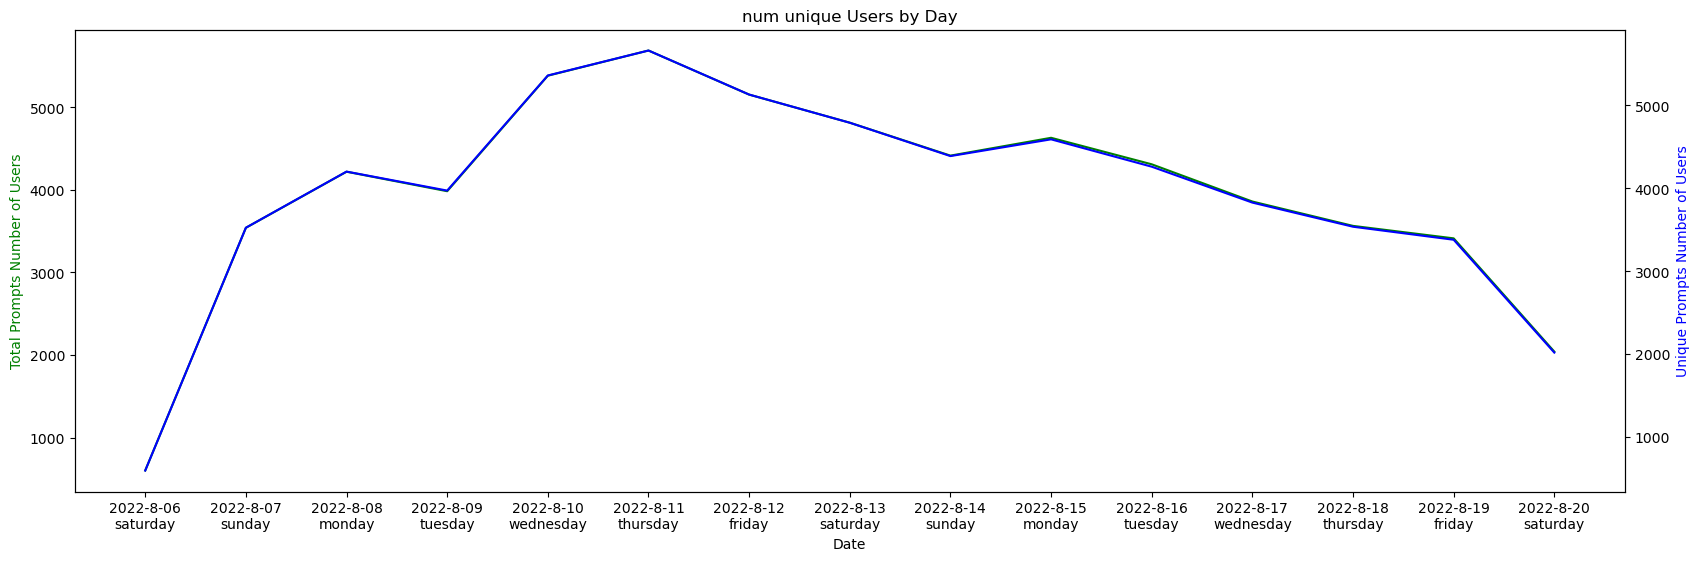

In [60]:
weekday_mapping = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
df_large["date"] = df_large.timestamp.apply(lambda x: f'{x.year}-{x.month}-{str(x.day).zfill(2)}\n{weekday_mapping[x.weekday()]}')
df_large_unique_prompts["date"] = df_large_unique_prompts.timestamp.apply(lambda x: f'{x.year}-{x.month}-{str(x.day).zfill(2)}\n{weekday_mapping[x.weekday()]}')


unique_users = df_large.groupby(["date"]).user_name.agg("unique")
unique_users_unique = df_large_unique_prompts.groupby(["date"]).user_name.agg("unique")


import matplotlib.pyplot as plt
x_data = []
y_data_total = []
y_data_unique = []

for index, value in unique_users.items():
    x_data.append(index)
    y_data_total.append(len(value))
    
for index, value in unique_users_unique.items():
    y_data_unique.append(len(value))

print(f'Number of unique users per day')
print(x_data)
print(y_data_total)
print(y_data_unique)

fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()
ax1.plot(x_data, y_data_total, 'g-')
ax2.plot(x_data, y_data_unique, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Prompts Number of Users', color='g')
ax2.set_ylabel('Unique Prompts Number of Users', color='b')
ax1.set_title('num unique Users by Day')

plt.show()

The values are very similar, for this reason we cannot see two lines in the plot unless we really zoom in.

## TODO something to evaluate the duplication behaviour

As in which day has the highest amount/proportion of duplicates

In [ ]:
as in 